In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv(r"/Salary Prediction of Data Professions.csv")

print(data)

     FIRST NAME   LAST NAME SEX         DOJ CURRENT DATE     DESIGNATION  \
0        TOMASA       ARMEN   F   5-18-2014   01-07-2016         Analyst   
1         ANNIE         NaN   F         NaN   01-07-2016       Associate   
2         OLIVE        ANCY   F   7-28-2014   01-07-2016         Analyst   
3        CHERRY     AQUILAR   F  04-03-2013   01-07-2016         Analyst   
4          LEON  ABOULAHOUD   M  11-20-2014   01-07-2016         Analyst   
...         ...         ...  ..         ...          ...             ...   
2634  KATHERINE      ALSDON   F   6-28-2011   01-07-2016  Senior Manager   
2635     LOUISE     ALTARAS   F   1-14-2014   01-07-2016         Analyst   
2636      RENEE      ALVINO   F   1-23-2014   01-07-2016         Analyst   
2637       TERI   ANASTASIO   F   3-17-2014   01-07-2016         Analyst   
2638    GREGORY      ABARCA   M   9-18-2014   01-07-2016         Analyst   

       AGE  SALARY        UNIT  LEAVES USED  LEAVES REMAINING  RATINGS  \
0     21.0   

1. Exploratory Data Analysis (EDA):

  FIRST NAME   LAST NAME SEX         DOJ CURRENT DATE DESIGNATION   AGE  \
0     TOMASA       ARMEN   F   5-18-2014   01-07-2016     Analyst  21.0   
1      ANNIE         NaN   F         NaN   01-07-2016   Associate   NaN   
2      OLIVE        ANCY   F   7-28-2014   01-07-2016     Analyst  21.0   
3     CHERRY     AQUILAR   F  04-03-2013   01-07-2016     Analyst  22.0   
4       LEON  ABOULAHOUD   M  11-20-2014   01-07-2016     Analyst   NaN   

   SALARY        UNIT  LEAVES USED  LEAVES REMAINING  RATINGS  PAST EXP  
0   44570     Finance         24.0               6.0      2.0         0  
1   89207         Web          NaN              13.0      NaN         7  
2   40955     Finance         23.0               7.0      3.0         0  
3   45550          IT         22.0               8.0      3.0         0  
4   43161  Operations         27.0               3.0      NaN         3  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns)

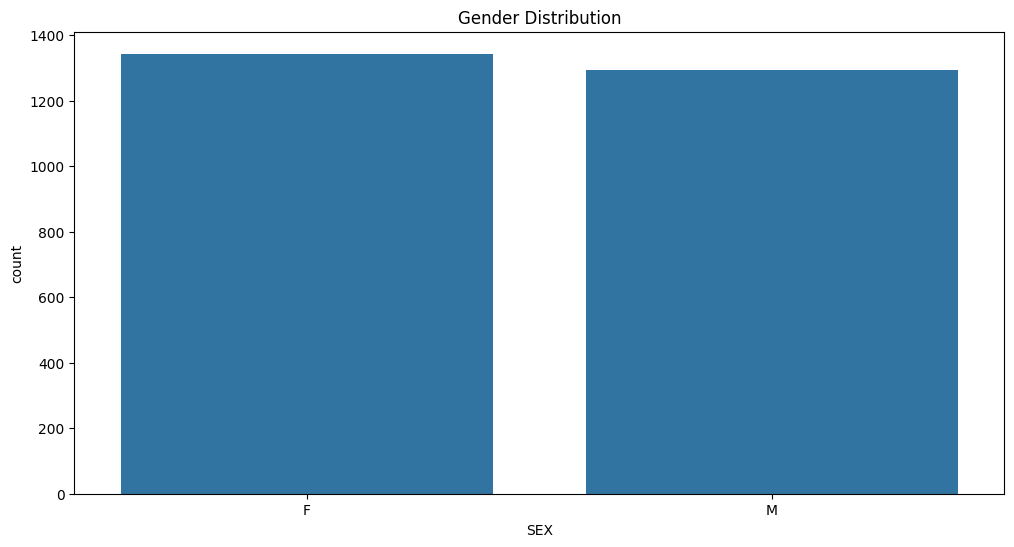

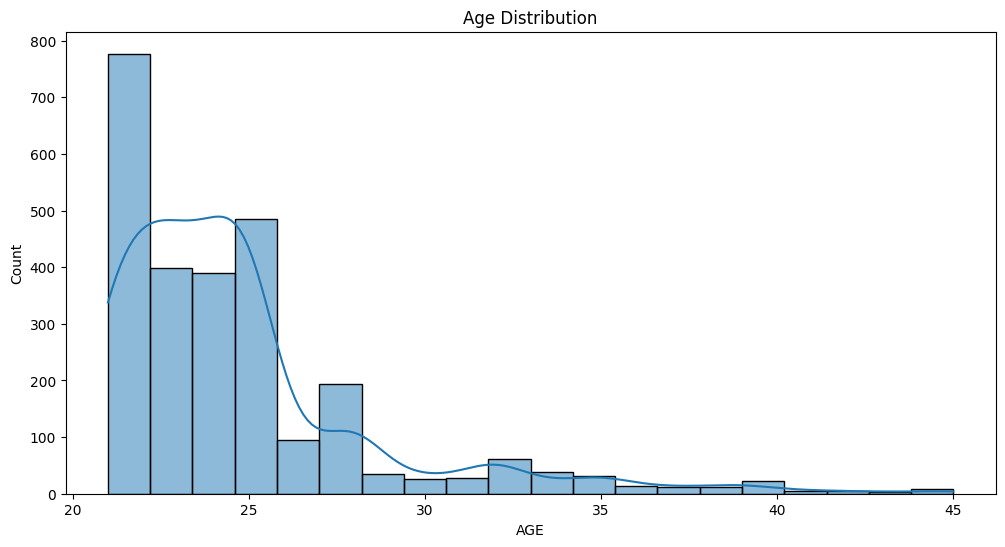

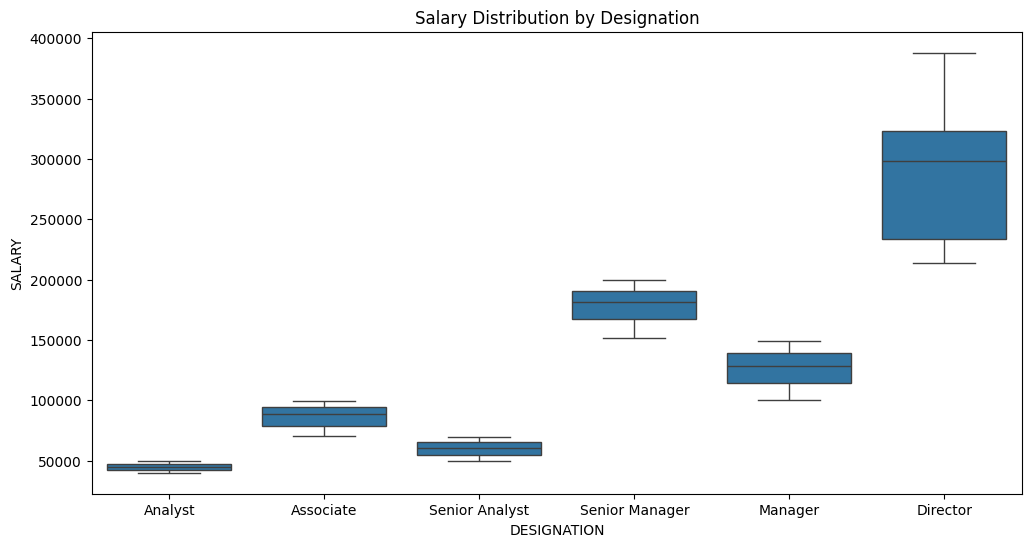

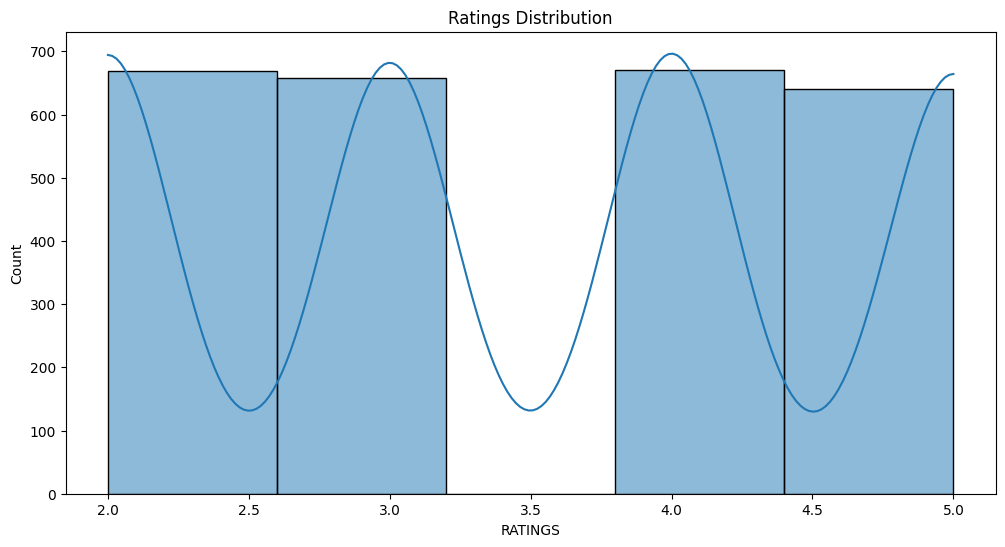

In [6]:

# Understand the data structure
print(data.head())
print(data.info())

# Summary Statistics
print(data.describe(include='all'))

# Missing Values Analysis
missing_values = data.isnull().sum()
print(missing_values)

# Data Distribution Visualization
plt.figure(figsize=(12, 6))
sns.countplot(x='SEX', data=data)
plt.title('Gender Distribution')

plt.figure(figsize=(12, 6))
sns.histplot(data['AGE'], bins=20, kde=True)
plt.title('Age Distribution')

plt.figure(figsize=(12, 6))
sns.boxplot(x='DESIGNATION', y='SALARY', data=data)
plt.title('Salary Distribution by Designation')

plt.figure(figsize=(12, 6))
sns.histplot(data['RATINGS'], bins=5, kde=True)
plt.title('Ratings Distribution')

plt.show()

# 2. Feature Engineering
Steps:

1.Extract Year from DOJ

2.Calculate Experience

3.Transform Categorical Variables

In [7]:
# Extract Year from DOJ
data['DOJ'] = pd.to_datetime(data['DOJ'], errors='coerce')
data['YEAR_OF_JOINING'] = data['DOJ'].dt.year

# Calculate Experience
data['EXPERIENCE'] = data['CURRENT DATE'].apply(lambda x: int(x.split('-')[2])) - data['YEAR_OF_JOINING']

# Transform Categorical Variables
data = pd.get_dummies(data, columns=['SEX', 'DESIGNATION', 'UNIT'])

# Handle Missing Values in Experience and Age
data['AGE'] = data['AGE'].fillna(data['AGE'].median())
data['EXPERIENCE'] = data['EXPERIENCE'].fillna(0)
data['LEAVES USED'] = data['LEAVES USED'].fillna(data['LEAVES USED'].median())
data['RATINGS'] = data['RATINGS'].fillna(data['RATINGS'].median())

print(data.head())



  FIRST NAME   LAST NAME        DOJ CURRENT DATE   AGE  SALARY  LEAVES USED  \
0     TOMASA       ARMEN 2014-05-18   01-07-2016  21.0   44570         24.0   
1      ANNIE         NaN        NaT   01-07-2016  24.0   89207         22.0   
2      OLIVE        ANCY 2014-07-28   01-07-2016  21.0   40955         23.0   
3     CHERRY     AQUILAR 2013-04-03   01-07-2016  22.0   45550         22.0   
4       LEON  ABOULAHOUD 2014-11-20   01-07-2016  24.0   43161         27.0   

   LEAVES REMAINING  RATINGS  PAST EXP  ...  DESIGNATION_Director  \
0               6.0      2.0         0  ...                 False   
1              13.0      3.0         7  ...                 False   
2               7.0      3.0         0  ...                 False   
3               8.0      3.0         0  ...                 False   
4               3.0      3.0         3  ...                 False   

   DESIGNATION_Manager  DESIGNATION_Senior Analyst  \
0                False                       False   
1 

3. Data Preprocessing
Steps:

1.Feature Scaling

2.Splitting Data into Training and Testing Sets

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop(['FIRST NAME', 'LAST NAME', 'DOJ', 'CURRENT DATE'], axis=1))

# Splitting Data
X = scaled_features
y = data['RATINGS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(2111, 22) (528, 22) (2111,) (528,)


4.Machine Learning Model Development
Steps:

1.Train a Model (e.g., Random Forest)

2.Model Evaluation Metrics

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Handle Missing Values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train a Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_imputed, y_train)

# Predictions
y_pred = model.predict(X_test_imputed)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



Mean Squared Error: 0.0
R-squared: 1.0


5. Model Evaluation

Steps:

1.Cross-Validation

In [12]:
from sklearn.model_selection import cross_val_score

# Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Average CV Score: {cv_scores.mean()}')


Cross-Validation Scores: [nan nan nan nan nan]
Average CV Score: nan


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 117, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 722, in score
    y_pred = self.predict(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 981, in predict
    X = self._validate_X_predict(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 602, in _validate_X_predict
    X = self._validate_data(X, dtype=DTYPE, accept_sparse="csr", reset=False)
  File "/usr/local/lib/p

6. ML Pipelines and Model Deployment

Steps:

1.Pipeline Creation

2.Save the Model

In [14]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import joblib

# Assuming X_train and y_train are already defined

# Handle Missing Values in X_train
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)

# Create and Train the Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

pipeline.fit(X_train_imputed, y_train)

# Save the Model
joblib.dump(pipeline, 'model_pipeline.pkl')



['model_pipeline.pkl']

7. Recommendations

Steps:

1.Improve Feature Engineering

2.Tune Hyperparameters

3.Experiment with Different Models

In [ ]:
1. **Improve Feature Engineering**:
   - Consider more advanced techniques such as polynomial features or interaction terms.

2. **Tune Hyperparameters**:
   - Use GridSearchCV or RandomizedSearchCV to find the optimal parameters for your model.

3. **Experiment with Different Models**:
   - Try other regression models such as Gradient Boosting, XGBoost, or neural networks to see if they perform better.
